In [2]:
import pandas as pandas
import geopandas as gpd
import rasterio

In [4]:
import rasterio

# Open the TIFF file
with rasterio.open(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\grid_infrustructure\global_1_1_1_1_1_0.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])


Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 24527, 'height': 8674, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009999999999999998, 0.0, -89.335692917,
       0.0, -0.01, 51.90425168)}
Dimensions (Height x Width): 8674 x 24527
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:4326
Affine Transformation: | 0.01, 0.00,-89.34|
| 0.00,-0.01, 51.90|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


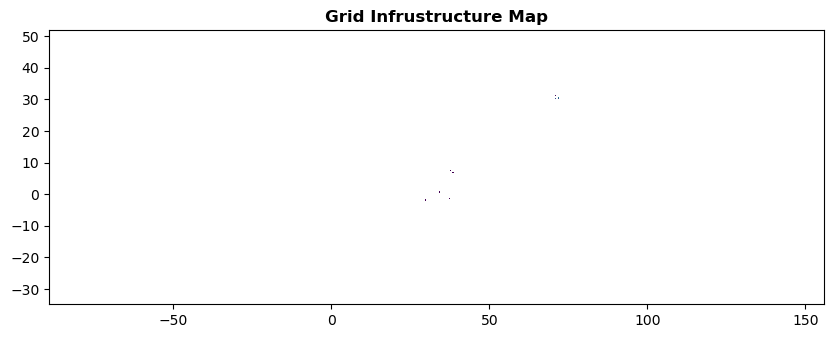

In [6]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the .tif raster file
with rasterio.open(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\grid_infrustructure\global_1_1_1_1_1_0.tif') as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster data
    show(src, ax=ax, title="Grid Infrustructure Map")

plt.show()


In [7]:
import rasterio
import pandas as pd
from rasterio.transform import rowcol

# Path to the TIFF file
tiff_path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\grid_infrustructure\global_1_1_1_1_1_0.tif'

# Open the TIFF file
with rasterio.open(tiff_path) as src:
    # Read the grid values (first band) into an array
    grid_array = src.read(1)  # Reading the first band, assuming it contains the grid data
    transform = src.transform  # Affine transform to map pixels to coordinates
    width, height = src.width, src.height  # Dimensions of the array

    # Prepare lists to store the results
    latitudes = []
    longitudes = []
    grid_values = []

    # Loop through each pixel to get its coordinate and value
    for row in range(height):
        for col in range(width):
            # Get the grid value at the current pixel
            grid_value = grid_array[row, col]

            # Ignore nodata values (optional)
            if grid_value == src.nodata:
                continue

            # Convert row, col to latitude, longitude
            lon, lat = rasterio.transform.xy(transform, row, col, offset='center')

            # Append to lists
            latitudes.append(lat)
            longitudes.append(lon)
            grid_values.append(grid_value)

# Create a DataFrame
grid_df = pd.DataFrame({
    "Latitude": latitudes,
    "Longitude": longitudes,
    "GridValue": grid_values
})

# Save to CSV
csv_path = "grid_infrastructure_data.csv"
grid_df.to_csv(csv_path, index=False)

print(f"Data saved to {csv_path}")


Data saved to grid_infrastructure_data.csv


In [8]:
grid_df

,Latitude,Longitude,GridValue
0,51.899252,99.259307,7
1,51.689252,99.309307,3
2,51.669252,99.319307,5
3,51.659252,100.529307,3
4,51.639252,100.859307,5
...,...,...,...
4235274,-34.820748,20.059307,98
4235275,-34.830748,19.999307,1
4235276,-34.830748,20.009307,1
4235277,-34.830748,20.019307,1
